In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt

# Import API key, it isn't working for some reason...  Had to manually enter and save.
from api_keys import api_key
api_key = "95fc7d255fb5e201f52e50459432f611"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

95fc7d255fb5e201f52e50459432f611


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

## Perform API Calls

In [3]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

query_url = base_url + api_key + "&q="

# Create empty lists to hold the results of all the values we want for corresponding lat/long
Results = []
City_Name = []
Country = []
Latitude = []
Longitude = []
Humidity = []
Max_Temperature = []
Cloudiness = []
Wind_Speed = []
Date_Time = []

for city in cities:
    # Sleep to prevent denial of access..
    # arg is in seconds
    time.sleep(0.1)
    city_url = query_url + city.replace(" ", "+")
    city_data = requests.get(city_url).json()
    print(f"Retrieving data for {city}")
    print()
    city_id = city_data.get('id')
    if city_data.get("id"):
        print(f"   Record found for City: {city}    City ID: {city_id}")
        print(city_url)
        Results.append(city_data)
        City_Name.append(city_data['name'])
        Country.append(city_data['sys']['country'])
        Latitude.append(city_data['coord']['lat'])
        Longitude.append(city_data['coord']["lon"])
        Humidity.append(city_data['main']['humidity'])
        Max_Temperature.append(city_data['main']['temp_max'])
        Cloudiness.append(city_data['clouds']['all'])
        Wind_Speed.append(city_data['wind']['speed'])
        Date_Time.append(city_data['dt'])
        print()
    elif city_data['cod'] == '404':
        print(f'No data found for city: {city}')
        print()
    print()

print()
print(f"Data Retrieval Complete")
            
#for city in cities:
#    print(f"Retrieving data for {city}:")
#    print()
    


Retrieving data for vaini

   Record found for City: vaini    City ID: 1273574
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=vaini


Retrieving data for klaksvik

   Record found for City: klaksvik    City ID: 2618795
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=klaksvik


Retrieving data for severo-kurilsk

   Record found for City: severo-kurilsk    City ID: 2121385
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=severo-kurilsk


Retrieving data for gornopravdinsk

   Record found for City: gornopravdinsk    City ID: 1506268
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=gornopravdinsk


Retrieving data for dikson

   Record found for City: dikson    City ID: 1507390
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432

Retrieving data for rikitea

   Record found for City: rikitea    City ID: 4030556
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=rikitea


Retrieving data for tasiilaq

   Record found for City: tasiilaq    City ID: 3424607
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=tasiilaq


Retrieving data for pevek

   Record found for City: pevek    City ID: 2122090
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=pevek


Retrieving data for cidreira

   Record found for City: cidreira    City ID: 3466165
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=cidreira


Retrieving data for bluff

   Record found for City: bluff    City ID: 2175403
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=bluff


Retrieving data for qaanaa

Retrieving data for naryan-mar

   Record found for City: naryan-mar    City ID: 523392
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=naryan-mar


Retrieving data for ahmadnagar

   Record found for City: ahmadnagar    City ID: 1279228
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=ahmadnagar


Retrieving data for genhe

   Record found for City: genhe    City ID: 2037252
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=genhe


Retrieving data for barrow

   Record found for City: barrow    City ID: 3833859
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=barrow


Retrieving data for ponta do sol

   Record found for City: ponta do sol    City ID: 3453439
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=ponta+do+sol

Retrieving data for olinda

   Record found for City: olinda    City ID: 3650121
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=olinda


Retrieving data for kodiak

   Record found for City: kodiak    City ID: 4407665
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=kodiak


Retrieving data for barentsburg

No data found for city: barentsburg


Retrieving data for rungata

No data found for city: rungata


Retrieving data for zwedru

   Record found for City: zwedru    City ID: 2272491
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=zwedru


Retrieving data for thompson

   Record found for City: thompson    City ID: 6165406
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=thompson


Retrieving data for ambon

   Record found for City: ambon    City ID: 3037899
http://ap

Retrieving data for upernavik

   Record found for City: upernavik    City ID: 3418910
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=upernavik


Retrieving data for namtsy

   Record found for City: namtsy    City ID: 2019488
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=namtsy


Retrieving data for petrokamenskoye

   Record found for City: petrokamenskoye    City ID: 1495144
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=petrokamenskoye


Retrieving data for kamenskoye

No data found for city: kamenskoye


Retrieving data for mackay

   Record found for City: mackay    City ID: 5921525
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=mackay


Retrieving data for new norfolk

   Record found for City: new norfolk    City ID: 2155415
http://api.openweathermap.org/da

Retrieving data for shirokiy

   Record found for City: shirokiy    City ID: 512255
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=shirokiy


Retrieving data for washougal

   Record found for City: washougal    City ID: 5815136
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=washougal


Retrieving data for gottmadingen

   Record found for City: gottmadingen    City ID: 2918612
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=gottmadingen


Retrieving data for jacqueville

   Record found for City: jacqueville    City ID: 2290582
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=jacqueville


Retrieving data for cozumel

No data found for city: cozumel


Retrieving data for grindavik

   Record found for City: grindavik    City ID: 3416888
http://api.openweathermap.org/d

Retrieving data for shingu

   Record found for City: shingu    City ID: 1847947
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=shingu


Retrieving data for manzil tamim

No data found for city: manzil tamim


Retrieving data for deming

   Record found for City: deming    City ID: 5464806
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=deming


Retrieving data for srednekolymsk

   Record found for City: srednekolymsk    City ID: 2121025
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=srednekolymsk


Retrieving data for iwanai

   Record found for City: iwanai    City ID: 2129868
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=iwanai


Retrieving data for vilyuysk

   Record found for City: vilyuysk    City ID: 2013392
http://api.openweathermap.org/data/2.5/weather?un

Retrieving data for ambunti

   Record found for City: ambunti    City ID: 2100933
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=ambunti


Retrieving data for bujumbura

   Record found for City: bujumbura    City ID: 425378
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=bujumbura


Retrieving data for zambezi

   Record found for City: zambezi    City ID: 895953
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=zambezi


Retrieving data for mitsamiouli

   Record found for City: mitsamiouli    City ID: 921786
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=mitsamiouli


Retrieving data for kuytun

   Record found for City: kuytun    City ID: 2021093
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=kuytun


Retrievi

Retrieving data for berlevag

   Record found for City: berlevag    City ID: 780687
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=berlevag


Retrieving data for kavaratti

   Record found for City: kavaratti    City ID: 1267390
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=kavaratti


Retrieving data for monticello

   Record found for City: monticello    City ID: 5038045
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=monticello


Retrieving data for padang

   Record found for City: padang    City ID: 1633419
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=padang


Retrieving data for nouadhibou

   Record found for City: nouadhibou    City ID: 2377457
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=nouadhibou

Retrieving data for caborca

   Record found for City: caborca    City ID: 3996893
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=caborca


Retrieving data for eyl

   Record found for City: eyl    City ID: 60019
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=eyl


Retrieving data for ankang

   Record found for City: ankang    City ID: 1789065
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=ankang


Retrieving data for geilo

   Record found for City: geilo    City ID: 3155913
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=geilo


Retrieving data for dolbeau

No data found for city: dolbeau


Retrieving data for omboue

   Record found for City: omboue    City ID: 2396853
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e5045943

Retrieving data for macklin

   Record found for City: macklin    City ID: 6063429
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=macklin


Retrieving data for alto piquiri

   Record found for City: alto piquiri    City ID: 3472437
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=alto+piquiri


Retrieving data for along

   Record found for City: along    City ID: 1278969
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=along


Retrieving data for lannion

   Record found for City: lannion    City ID: 3007609
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=lannion


Retrieving data for metro

   Record found for City: metro    City ID: 1635283
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=metro


Retrieving data f

Retrieving data for kharp

   Record found for City: kharp    City ID: 1503726
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=kharp


Retrieving data for mezen

   Record found for City: mezen    City ID: 527321
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=mezen


Retrieving data for dubbo

   Record found for City: dubbo    City ID: 2168305
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=dubbo


Retrieving data for sungaipenuh

   Record found for City: sungaipenuh    City ID: 1625929
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=sungaipenuh


Retrieving data for fevralsk

No data found for city: fevralsk


Retrieving data for iberia

   Record found for City: iberia    City ID: 3938531
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255

Retrieving data for tanete

   Record found for City: tanete    City ID: 1629965
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=tanete


Retrieving data for kutum

   Record found for City: kutum    City ID: 371745
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=kutum


Retrieving data for gejiu

   Record found for City: gejiu    City ID: 1810240
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=gejiu


Retrieving data for fort nelson

   Record found for City: fort nelson    City ID: 5955902
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=fort+nelson


Retrieving data for saldanha

   Record found for City: saldanha    City ID: 2737599
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=saldanha


Retrieving data for k

Retrieving data for killybegs

   Record found for City: killybegs    City ID: 2963295
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=killybegs


Retrieving data for kieta

   Record found for City: kieta    City ID: 2094027
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=kieta


Retrieving data for bandiagara

   Record found for City: bandiagara    City ID: 2460489
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=bandiagara


Retrieving data for bethanien

   Record found for City: bethanien    City ID: 3358416
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95fc7d255fb5e201f52e50459432f611&q=bethanien


Retrieving data for olafsvik

No data found for city: olafsvik


Retrieving data for kamenka

   Record found for City: kamenka    City ID: 553725
http://api.openweathermap.org/data/2.5/weather?units=I

In [14]:
weather = {"Latitude": Latitude, "Longitude": Longitude, 
           "City": City_Name, "Country": Country, 
           "Temperature (F)": Max_Temperature, 
           "Humidity (%)": Humidity, "Cloudiness (%)": Cloudiness, 
           "Wind Speed (mph)": Wind_Speed}

weather_df = pd.DataFrame(weather)
weather_df.to_csv('city_weather.csv')
weather_df.head()

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,15.34,74.49,Vaini,IN,67.40,98,92,5.75
1,62.23,-6.59,Klaksvik,FO,50.00,87,80,12.75
2,50.68,156.12,Severo-Kurilsk,RU,51.47,100,20,3.51
3,60.06,69.92,Gornopravdinsk,RU,55.79,98,92,10.45
4,73.51,80.55,Dikson,RU,49.76,81,100,17.49


In [15]:
above_eq = weather_df.loc[weather_df['Latitude'] > 0]
below_eq = weather_df.loc[weather_df['Latitude'] < 0]

num_above = len(above_eq)
num_below = len(below_eq)

print(f"Of our sample cities, {num_above} are above the equator.")
print(f"Of our sample cities, {num_below} are below the equator.")

Of our sample cities, 387 are above the equator.
Of our sample cities, 162 are below the equator.


In [16]:
date_time = dt.now().strftime("%H:%M:%S    %m/%d/%Y")
print(date_time)

16:30:50    08/09/2018


([<matplotlib.axis.XTick at 0x18f8e9e2ac8>,
 <a list of 13 Text xticklabel objects>)

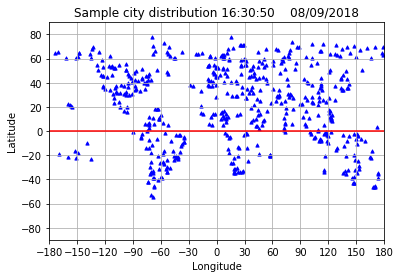

In [17]:
# Show a scatter of long/lat to visualize where cities samples are located

longs_lats = plt.scatter(weather_df['Longitude'], weather_df['Latitude'], c='blue',
                        marker='^', s=10, alpha=1)
plt.title(f'Sample city distribution {date_time}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.grid()
plt.axhline(color='r')
plt.xticks(np.arange(-180, 190, 30))


([<matplotlib.axis.YTick at 0x18f8fe1bf28>,
 <a list of 7 Text yticklabel objects>)

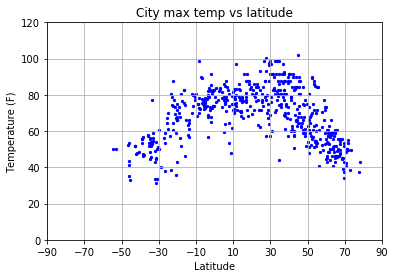

In [23]:
# Temp vs latitude

temp_lats = plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'],
                       c='blue', marker="o", s=5)
plt.grid()
plt.title(f'City max temp vs latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xticks(np.arange(-90, 100, 20))
plt.yticks(np.arange(0, 130, 20))

Text(0.5,1,'City humidity by latitude')

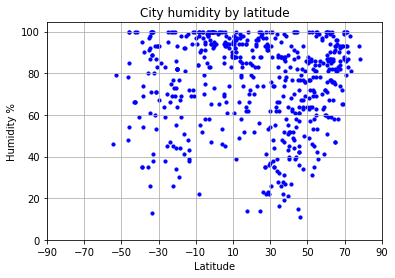

In [26]:
# Humidity vs latitude

hum_lats = plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], 
                      s=10, color='blue', marker='o')

plt.grid()
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.xticks(np.arange(-90, 100, 20))
plt.yticks(np.arange(0, 110, 20))
plt.title(f'City humidity by latitude')

Text(0.5,1,'City cloudiness by latitude')

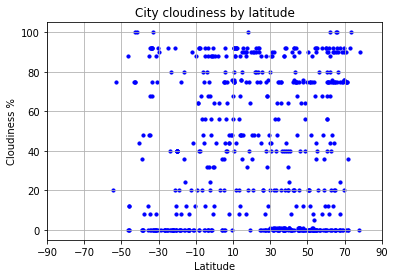

In [27]:
# Cloudiness by latitude

cloud_lats = plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], 
                      s=10, color='blue', marker='o')

plt.grid()
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.xticks(np.arange(-90, 100, 20))
plt.yticks(np.arange(0, 110, 20))
plt.title(f'City cloudiness by latitude')

Text(0.5,1,'City wind speed by latitude')

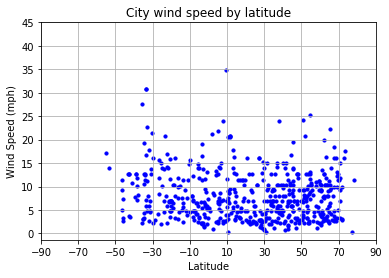

In [31]:
# Wind speed by latitude

wind_lats = plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], 
                      s=10, color='blue', marker='o')

plt.grid()
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.xticks(np.arange(-90, 100, 20))
plt.yticks(np.arange(0, 50, 5))
plt.title(f'City wind speed by latitude')

Observations

1. No correlation between latitude and cloudiness
2. Max temp is higher in locations above the equator, not at the equator, which isn't what I'd expected.
3. No correlation between wind speed and latitude.
4. I forgot to do these observations, and now it's 10 PM on the night this assignment is due.  Sorry these are not very insightful.